In [1]:
import geopandas as gpd

In [2]:
coastline_shp = gpd.read_file("data/coastline_marine_attr.shp")

<AxesSubplot:>

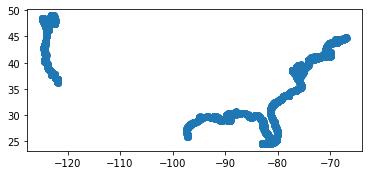

In [3]:
coastline_shp.plot()

In [4]:
coastline_shp.head()

,CID,salinity,srtm30,silicate,phosphate,nitrate,disso2,temp,geometry
0,1,36.1645,-13.54730,2.14787,0.085490,0.672583,4.73538,26.0314,POINT (-82.22100 24.50021)
1,1,35.8820,-5.29631,3.39048,0.081309,0.589654,4.82170,26.2659,POINT (-81.16694 25.14926)
2,1,28.2685,5.36795,4.50515,0.220880,1.225100,4.74903,23.2961,POINT (-90.58674 29.24938)
3,1,27.8134,-11.50460,2.30621,0.353542,2.226290,5.55894,14.3673,POINT (-76.05466 36.96940)
4,1,16.0193,-4.73809,2.47356,0.409711,2.607220,5.76708,13.9874,POINT (-76.38891 39.27398)


In [5]:
coastline_shp["x"] = coastline_shp["geometry"].x
coastline_shp["y"] = coastline_shp["geometry"].y
coastline_shp.head()

,CID,salinity,srtm30,silicate,phosphate,nitrate,disso2,temp,geometry,x,y
0,1,36.1645,-13.54730,2.14787,0.085490,0.672583,4.73538,26.0314,POINT (-82.22100 24.50021),-82.221000,24.500212
1,1,35.8820,-5.29631,3.39048,0.081309,0.589654,4.82170,26.2659,POINT (-81.16694 25.14926),-81.166938,25.149262
2,1,28.2685,5.36795,4.50515,0.220880,1.225100,4.74903,23.2961,POINT (-90.58674 29.24938),-90.586741,29.249380
3,1,27.8134,-11.50460,2.30621,0.353542,2.226290,5.55894,14.3673,POINT (-76.05466 36.96940),-76.054661,36.969399
4,1,16.0193,-4.73809,2.47356,0.409711,2.607220,5.76708,13.9874,POINT (-76.38891 39.27398),-76.388908,39.273977


In [6]:
training_data = coastline_shp.sample(frac=0.8, random_state=42)
test_data = coastline_shp.drop(training_data.index)

In [8]:
training_X = training_data[["salinity","srtm30", "silicate", "phosphate", "disso2","temp","x","y"]]
training_y = training_data["nitrate"]


In [9]:
training_X.head()

,salinity,srtm30,silicate,phosphate,disso2,temp,x,y
6252,33.1483,-56.1788,17.08550,1.138370,5.36714,9.83431,-124.496989,42.579380
4684,35.7009,-21.0945,1.38960,0.199679,5.05932,21.88080,-77.202987,34.580760
1731,35.4923,-17.9311,2.58428,0.131155,4.91319,23.08300,-81.368064,30.280428
4742,30.8778,-57.5877,15.09390,1.082800,6.37896,9.31756,-122.636420,48.201936
4521,32.6253,-68.5389,4.57709,0.671806,6.41385,7.43766,-67.829796,44.443662


In [10]:
training_y.head()

6252    9.058800
4684    1.079670
1731    0.844095
4742    7.414680
4521    5.384510
Name: nitrate, dtype: float64

In [11]:
test_X = test_data[["salinity","srtm30", "silicate", "phosphate", "disso2","temp","x","y"]]
test_y = test_data["nitrate"]

In [12]:
test_X.head()

,salinity,srtm30,silicate,phosphate,disso2,temp,x,y
1,35.8820,-5.29631,3.39048,0.081309,4.82170,26.2659,-81.166938,25.149262
4,16.0193,-4.73809,2.47356,0.409711,5.76708,13.9874,-76.388908,39.273977
5,32.8363,-23.88640,2.49948,0.447603,6.09137,11.0929,-74.619716,39.199345
9,33.2107,-66.57840,14.07950,1.038130,5.11104,10.9927,-123.831919,39.315070
11,36.1044,-6.67929,2.73115,0.082114,4.66640,26.3431,-81.561696,24.817648


In [13]:
test_y.head()

1     0.589654
4     2.607220
5     2.762620
9     8.105710
11    0.697750
Name: nitrate, dtype: float64

In [14]:
def standardize_data(data, stats):
    return (data - stats['mean'])/stats['std']

In [15]:
training_stats = training_X.describe().transpose()
training_stats

,count,mean,std,min,25%,50%,75%,max
salinity,8000.0,32.076842,3.840187,12.673200,31.098200,32.422650,34.911700,36.830200
srtm30,8000.0,-23.863390,21.752314,-114.478000,-37.434100,-17.971800,-6.471520,9.989880
silicate,8000.0,5.366715,4.767795,0.883515,2.454580,3.482660,4.285680,17.366300
phosphate,8000.0,0.445437,0.349368,0.057359,0.150106,0.362048,0.604953,1.164930
disso2,8000.0,5.428788,0.673296,4.542900,4.801210,5.138250,6.166140,6.745130
temp,8000.0,16.639811,6.719949,7.092050,9.941270,14.367300,22.998700,26.763200
x,8000.0,-89.072117,18.564714,-124.821279,-94.770370,-81.845184,-75.784093,-66.884505
y,8000.0,35.850917,7.253365,24.458206,29.442121,36.972908,41.565428,49.069979


In [17]:
training_X.describe()

,salinity,srtm30,silicate,phosphate,disso2,temp,x,y
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,32.076842,-23.863390,5.366715,0.445437,5.428788,16.639811,-89.072117,35.850917
std,3.840187,21.752314,4.767795,0.349368,0.673296,6.719949,18.564714,7.253365
min,12.673200,-114.478000,0.883515,0.057359,4.542900,7.092050,-124.821279,24.458206
25%,31.098200,-37.434100,2.454580,0.150106,4.801210,9.941270,-94.770370,29.442121
50%,32.422650,-17.971800,3.482660,0.362048,5.138250,14.367300,-81.845184,36.972908
75%,34.911700,-6.471520,4.285680,0.604953,6.166140,22.998700,-75.784093,41.565428
max,36.830200,9.989880,17.366300,1.164930,6.745130,26.763200,-66.884505,49.069979


In [18]:
training_X_std = standardize_data(training_X, training_stats)

In [19]:
training_X_std.head()

,salinity,srtm30,silicate,phosphate,disso2,temp,x,y
6252,0.279012,-1.485608,2.457905,1.983390,-0.091562,-1.012731,-1.908183,0.927633
4684,0.943719,0.127292,-0.834162,-0.703435,-0.548746,0.779915,0.639338,-0.175113
1731,0.889399,0.272720,-0.583590,-0.899572,-0.765783,0.958815,0.414984,-0.767987
4742,-0.312235,-1.550378,2.040185,1.824331,1.411225,-1.089629,-1.807962,1.702798
4521,0.142821,-2.053828,-0.165616,0.647939,1.463045,-1.369378,1.144231,1.184656


In [20]:
test_X_std = standardize_data(test_X, training_stats)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [37]:
ridge_model = Ridge()
ridge_model.fit(training_X_std, training_y)

Ridge()

In [22]:
linear_model = LinearRegression()
linear_model.fit(training_X_std, training_y)

LinearRegression()

In [23]:
test_y_pred = linear_model.predict(test_X_std)

In [38]:
test_y_pred2 = ridge_model.predict(test_X_std)

In [24]:
test_y_pred[0]

0.6816695058041873

In [26]:
test_y[0:1]

1    0.589654
Name: nitrate, dtype: float64

In [27]:
import matplotlib.pyplot as plt

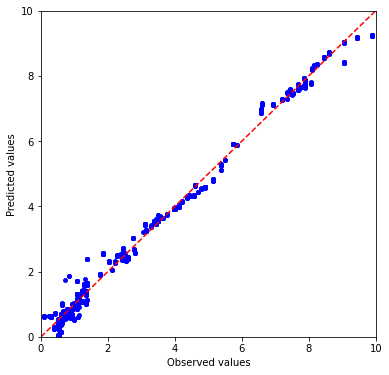

In [31]:
plt.figure(figsize=(6,6))
plt.scatter(test_y,test_y_pred,s=15, c='blue')
plt.xlabel("Observed values")
plt.ylabel("Predicted values")
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.plot([0,10],[0,10],'r--')



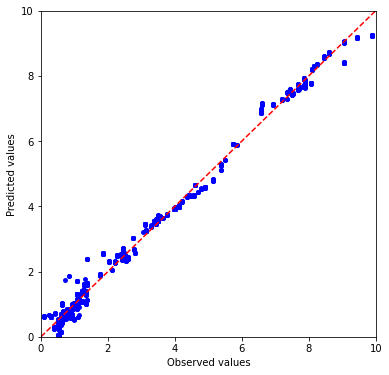

In [39]:
plt.figure(figsize=(6,6))
plt.scatter(test_y,test_y_pred2,s=15, c='blue')
plt.xlabel("Observed values")
plt.ylabel("Predicted values")
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.plot([0,10],[0,10],'r--')

In [32]:
from sklearn.metrics import mean_squared_error


In [33]:
rmse = mean_squared_error(test_y,test_y_pred,squared=False)
rmse

0.22856738574157417

In [40]:
rmse = mean_squared_error(test_y,test_y_pred2,squared=False)
rmse

0.22861905238602645

In [34]:
from scipy import stats

In [35]:
stats.pearsonr(test_y,test_y_pred)

(0.9964267781327345, 0.0)

In [41]:
stats.pearsonr(test_y,test_y_pred2)

(0.9964263519921293, 0.0)